In [1]:
#importing necessary libraries
import pandas as pd # for managing and analyzing structured data
import numpy as np # for mathematical and numerical operations
import seaborn as sns # for advanced charts
import matplotlib.pyplot as plt # for basic charts
import os
# Set style
sns.set_style("whitegrid")

In [2]:
#loading the dataset and checking top 5
df = pd.read_excel("Railway_Dataset.xlsx")
df.head()

,Transaction_ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


# Data Understanding and Cleaning

## Column Renaming

Column names were standardized by removing spaces and converting them to lowercase with underscores (snake_case format).

Example:
- `Ticket Class` → `ticket_class`
- `Date of Purchase` → `date_of_purchase`

This improves readability, prevents syntax issues, and follows industry best practices for clean, production-ready datasets.

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
# checking number of rows and columns
df.shape

(31653, 18)

In [7]:
#checking last row
df.tail(1)

,transaction_id,date_of_purchase,time_of_purchase,purchase_type,payment_method,railcard,ticket_class,ticket_type,price,departure_station,arrival_destination,date_of_journey,departure_time,arrival_time,actual_arrival_time,journey_status,reason_for_delay,refund_request
31652,1d5d89a2-bde5-410f-8f91,2024-04-30,20:05:39,Station,Credit Card,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-04-30,21:30:00,22:00:00,22:00:00,On Time,NaN,No


In [8]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_id       31653 non-null  object        
 1   date_of_purchase     31653 non-null  datetime64[ns]
 2   time_of_purchase     31653 non-null  object        
 3   purchase_type        31653 non-null  object        
 4   payment_method       31653 non-null  object        
 5   railcard             10735 non-null  object        
 6   ticket_class         31653 non-null  object        
 7   ticket_type          31653 non-null  object        
 8   price                31653 non-null  int64         
 9   departure_station    31653 non-null  object        
 10  arrival_destination  31653 non-null  object        
 11  date_of_journey      31653 non-null  datetime64[ns]
 12  departure_time       31653 non-null  object        
 13  arrival_time         31653 non-

In [9]:
df.columns

Index(['transaction_id', 'date_of_purchase', 'time_of_purchase',
       'purchase_type', 'payment_method', 'railcard', 'ticket_class',
       'ticket_type', 'price', 'departure_station', 'arrival_destination',
       'date_of_journey', 'departure_time', 'arrival_time',
       'actual_arrival_time', 'journey_status', 'reason_for_delay',
       'refund_request'],
      dtype='object')

# Column Definition

| Column Name              | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Transaction ID           | Unique identifier for an individual train ticket purchase                  |
| Date of Purchase         | Date the ticket was purchased                                               |
| Time of Purchase         | Time the ticket was purchased                                               |
| Purchase Type            | Whether the ticket was purchased online or directly at a train station     |
| Payment Method           | Payment method used to purchase the ticket (Contactless, Credit Card, etc.)|
| Railcard                 | Whether the passenger is a National Railcard holder (Adult, etc.)          |
| Ticket Class             | Seat class for the ticket (Standard or First)                               |
| Ticket Type              | When you bought or can use the ticket (e.g., Advance tickets, etc.)        |
| Price                    | Final cost of the ticket                                                    |
| Departure Station        | Station to board the train                                                  |
| Arrival Destination      | Station to exit the train                                                   |
| Date of Journey          | Date the train departed                                                     |
| Departure Time           | Time the train departed                                                     |
| Arrival Time             | Time the train was scheduled to arrive at its destination                   |
| Actual Arrival Time      | Time the train arrived at its destination                                   |
| Journey Status           | Whether the train was on time, delayed, or cancelled                        |
| Reason for Delay         | Reason for the delay or cancellation                                        |
| Refund Request           | Whether the passenger requested a refund after a delay or cancellation      |

In [12]:
#checking summary statistics for numerical columns
df.describe()

,date_of_purchase,price,date_of_journey
count,31653,31653.000000,31653
mean,2024-02-28 16:16:36.303667968,23.439200,2024-03-01 08:01:10.969576192
min,2023-12-08 00:00:00,1.000000,2024-01-01 00:00:00
25%,2024-01-30 00:00:00,5.000000,2024-01-31 00:00:00
50%,2024-03-01 00:00:00,11.000000,2024-03-01 00:00:00
75%,2024-03-31 00:00:00,35.000000,2024-03-31 00:00:00
max,2024-04-30 00:00:00,267.000000,2024-04-30 00:00:00
std,NaN,29.997628,NaN


## Data Type Conversion

In [14]:
time_columns = [
    'time_of_purchase',
    'departure_time',
    'arrival_time',
    'actual_arrival_time'
]

for col in time_columns:
    df[col] = pd.to_datetime(df[col], format='%H:%M:%S')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_id       31653 non-null  object        
 1   date_of_purchase     31653 non-null  datetime64[ns]
 2   time_of_purchase     31653 non-null  datetime64[ns]
 3   purchase_type        31653 non-null  object        
 4   payment_method       31653 non-null  object        
 5   railcard             10735 non-null  object        
 6   ticket_class         31653 non-null  object        
 7   ticket_type          31653 non-null  object        
 8   price                31653 non-null  int64         
 9   departure_station    31653 non-null  object        
 10  arrival_destination  31653 non-null  object        
 11  date_of_journey      31653 non-null  datetime64[ns]
 12  departure_time       31653 non-null  datetime64[ns]
 13  arrival_time         31653 non-

In [16]:
#to return the number of distinct/unique values(non-duplicate) in each column
df.nunique()

transaction_id         31653
date_of_purchase         128
time_of_purchase       24351
purchase_type              2
payment_method             3
railcard                   3
ticket_class               2
ticket_type                3
price                    125
departure_station         12
arrival_destination       32
date_of_journey          121
departure_time            96
arrival_time             203
actual_arrival_time      623
journey_status             3
reason_for_delay           8
refund_request             2
dtype: int64

In [17]:
#to check for duplicate records
df.duplicated().sum()

0

In [18]:
#Are there any duplicate rows?
df.duplicated().any()

False

## Checking and Handling missing values

In [20]:
#to check for missing/incomplete records
df.isna().sum()[df.isna().sum() > 0]

railcard               20918
actual_arrival_time     1880
reason_for_delay       27481
dtype: int64

In [21]:
# Check railcard  Missing Values
missing_railcard  = df['railcard'].isna().sum()
total_rows = len(df)
percentage_missing_railcard = (missing_railcard / total_rows) * 100

print(f"Missing railcard Values: {missing_railcard}")
print(f"Percentage Missing: {percentage_missing_railcard:.2f}%")

Missing railcard Values: 20918
Percentage Missing: 66.09%


In [22]:
df['railcard'].unique()

array(['Adult', nan, 'Disabled', 'Senior'], dtype=object)

In [23]:
df['railcard'] = df['railcard'].fillna('No Railcard')

#### Railcard

The railcard column contained 20,918 missing values (66.09%).  
Upon investigation, these missing values represent passengers who did not use a railcard when purchasing their ticket.

This type of missing data is *structural missingness*, meaning the absence of a value carries business meaning rather than 
indicating a data quality issue.

Since a passenger without a railcard legitimately has no applicable railcard type, the missing values were replaced with *"No Railcard"* 
to improve clarity and allow accurate categorical analysis.

No numerical imputation was required.


In [25]:
# Check actual_arrival_time  Missing Values
missing_actual_arrival_time  = df['actual_arrival_time'].isnull().sum()
total_rows = len(df)
percentage_missing_actual_arrival_time = (missing_actual_arrival_time / total_rows) * 100

print(f"Missing actual_arrival_time Values: {missing_actual_arrival_time}")
print(f"Percentage Missing: {percentage_missing_actual_arrival_time:.2f}%")

Missing actual_arrival_time Values: 1880
Percentage Missing: 5.94%


In [26]:
#confirming if missing actual arrival time corresponds to cancelled trip using journey status
df[df['actual_arrival_time'].isna()]['journey_status'].value_counts()

journey_status
Cancelled    1880
Name: count, dtype: int64

### actual_arrival_time

- `actual_arrival_time` contained 1,880 missing values (5.94%).
- Investigation showed all missing records corresponded to cancelled journeys.
- Since cancelled trains do not have an arrival time, these missing values are logically expected.
- Therefore, no imputation was performed.

In [28]:
# Check reason_for_delay  Missing Values
missing_reason_for_delay  = df['reason_for_delay'].isnull().sum()
total_rows = len(df)
percentage_missing_reason_for_delay= (missing_reason_for_delay / total_rows) * 100

print(f"Missing reason_for_delay Values: {missing_reason_for_delay}")
print(f"Percentage Missing: {percentage_missing_reason_for_delay:.2f}%")

Missing reason_for_delay Values: 27481
Percentage Missing: 86.82%


In [29]:
df['reason_for_delay'] = df['reason_for_delay'].fillna('No Delay')

#### Reason for Delay

The reason_for_delay column contained 27,481 missing values (86.82%).  
Further inspection showed that these records correspond to journeys that were not delayed.

Because only delayed journeys require a reason, the missing values are *conditionally missing*, not random errors.

To ensure clarity during analysis and grouping, missing values were replaced with *"No Delay"*, making the dataset easier to interpret and analyze without altering the underlying business logic.

In [31]:
#to check for missing/incomplete records again
df.isna().sum()[df.isna().sum() > 0]

actual_arrival_time    1880
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_id       31653 non-null  object        
 1   date_of_purchase     31653 non-null  datetime64[ns]
 2   time_of_purchase     31653 non-null  datetime64[ns]
 3   purchase_type        31653 non-null  object        
 4   payment_method       31653 non-null  object        
 5   railcard             31653 non-null  object        
 6   ticket_class         31653 non-null  object        
 7   ticket_type          31653 non-null  object        
 8   price                31653 non-null  int64         
 9   departure_station    31653 non-null  object        
 10  arrival_destination  31653 non-null  object        
 11  date_of_journey      31653 non-null  datetime64[ns]
 12  departure_time       31653 non-null  datetime64[ns]
 13  arrival_time         31653 non-

### Core Descriptive Analysis

- **Total Revenue:** Sum of all ticket prices, representing overall earnings from all journeys.  
- **Average Ticket Price:** Mean of ticket prices, giving an idea of typical spending per customer.  
- **Top 5 Departure Stations:** Stations with the highest number of journeys, indicating busiest origins.  
- **Top 5 Arrival Destinations:** Destinations with the highest number of journeys, showing most popular endpoints.  
- **Most Frequently Used Payment Method:** Payment method used most often, reflecting customer preference.

> These metrics provide a high-level overview of ticket sales, customer behavior, and station activity.

In [34]:
#  Total Revenue Generated
total_revenue = df['price'].sum()
print("Total Revenue:", f"$",total_revenue)

Total Revenue: $ 741921


In [35]:
#  Average Ticket Price
avg_ticket_price = df['price'].mean()
print("Average Ticket Price:", avg_ticket_price)

Average Ticket Price: 23.439200075822196


In [36]:
#  Top 5 Departure Stations by Journeys
top_departure = df['departure_station'].value_counts().head(5)
print("Top 5 Departure Stations:\n", top_departure)

Top 5 Departure Stations:
 departure_station
Manchester Piccadilly    5650
London Euston            4954
Liverpool Lime Street    4561
London Paddington        4500
London Kings Cross       4229
Name: count, dtype: int64


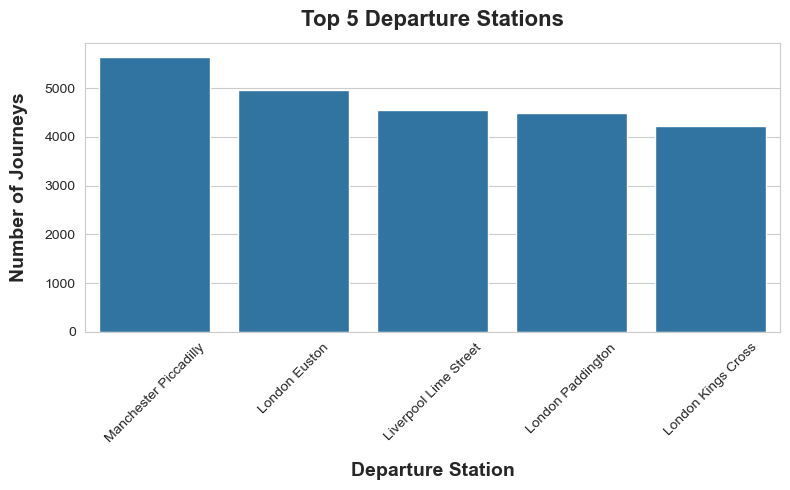

In [37]:
# Top 5 Departure Stations (Vertical Bar)
plt.figure(figsize=(8,5))
sns.barplot(x=top_departure.index, y=top_departure.values)
plt.title("Top 5 Departure Stations", fontsize = 16, fontweight = 'bold', pad = 12)
plt.xlabel("Departure Station", fontsize = 14, fontweight = 'bold', labelpad = 12)
plt.ylabel("Number of Journeys", fontsize = 14, fontweight = 'bold', labelpad = 12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Top 5 Departure Stations.png")
plt.show()

In [38]:
#  Top 5 Arrival Destinations
top_arrival = df['arrival_destination'].value_counts().head(5)
print("Top 5 Arrival Destinations:\n", top_arrival)

Top 5 Arrival Destinations:
 arrival_destination
Birmingham New Street    7742
Liverpool Lime Street    5022
York                     4019
Manchester Piccadilly    3968
Reading                  3920
Name: count, dtype: int64


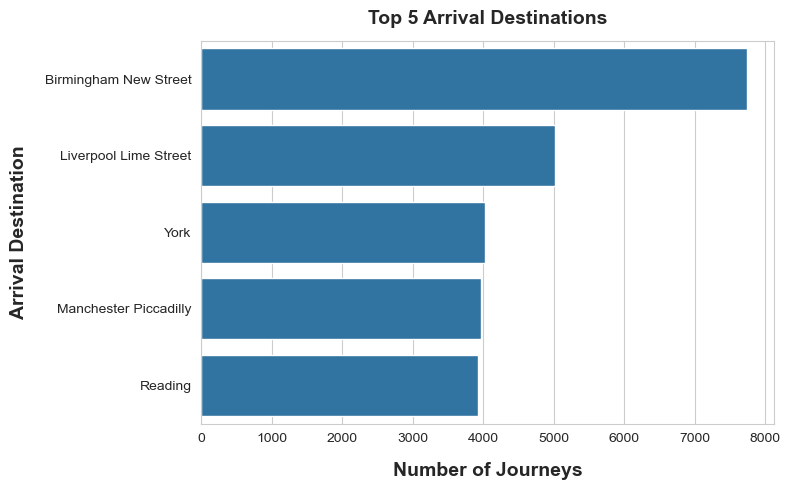

In [39]:
# Top 5 Arrival Destinations (Horizontal Bar)
plt.figure(figsize=(8,5))
sns.barplot(x=top_arrival.values, y=top_arrival.index)
plt.title("Top 5 Arrival Destinations", fontsize = 14, fontweight = 'bold', pad = 12)
plt.xlabel("Number of Journeys", fontsize = 14, fontweight = 'bold', labelpad = 12)
plt.ylabel("Arrival Destination", fontsize = 14, fontweight = 'bold', labelpad = 12)
plt.tight_layout()
plt.savefig("Top 5 Arrival Destinations.png")
plt.show()

In [40]:
#  Most Frequently Used Payment Method
top_payment = df['payment_method'].value_counts().head(1)
print("Most Frequently Used Payment Method:\n", top_payment)

Most Frequently Used Payment Method:
 payment_method
Credit Card    19136
Name: count, dtype: int64


# Core Descriptive Analysis Results
- Total Revenue: The railway ticket sales dataset generated a total revenue of $741,921, representing the overall earnings from all journeys.
  
- Average Ticket Price: The mean ticket price is $23.44, indicating the typical amount spent by a passenger per journey.

  
- Top 5 Departure Stations: The busiest origin stations are:


    - Manchester Piccadilly – 5,650 journeys
    - London Euston – 4,954 journeys
    - Liverpool Lime Street – 4,561 journeys
    - London Paddington – 4,500 journeys
    - London Kings Cross – 4,229 journeys
      
- Top 5 Arrival Destinations: The most popular destinations based on journey counts are:


    - Birmingham New Street – 7,742 journeys
    - Liverpool Lime Street – 5,022 journeys
    - York – 4,019 journeys
    - Manchester Piccadilly – 3,968 journeys
    - Reading – 3,920 journeys
  
- Most Frequently Used Payment Method: Credit Card is the preferred method, used in 19,136 transactions, showing passenger payment behavior.

These results provide a high-level overview of revenue, pricing trends, and passenger patterns, helping identify key stations and customer preferences for strategic planning.

### Customer & Ticket Insights

- **Most Commonly Purchased Ticket Type:** Identifies the ticket type that passengers buy most frequently.  
- **Most Used Ticket Class:** Shows which class (e.g., Standard, First) is preferred by most passengers.  
- **Average Ticket Price by Class:** Calculates the mean ticket price for each class, highlighting pricing differences.  
- **Comparison by Railcard Holders:** Compares average ticket prices between passengers with a railcard and those without, showing the impact of railcard discounts on spending.

> These insights help understand customer preferences, ticket class popularity, and pricing patterns, which can inform marketing and pricing strategies.

In [43]:
# Most Commonly Purchased Ticket Type
most_common_ticket_type = df['ticket_type'].value_counts().head(1)
print("Most Common Ticket Type:\n", most_common_ticket_type)

Most Common Ticket Type:
 ticket_type
Advance    17561
Name: count, dtype: int64


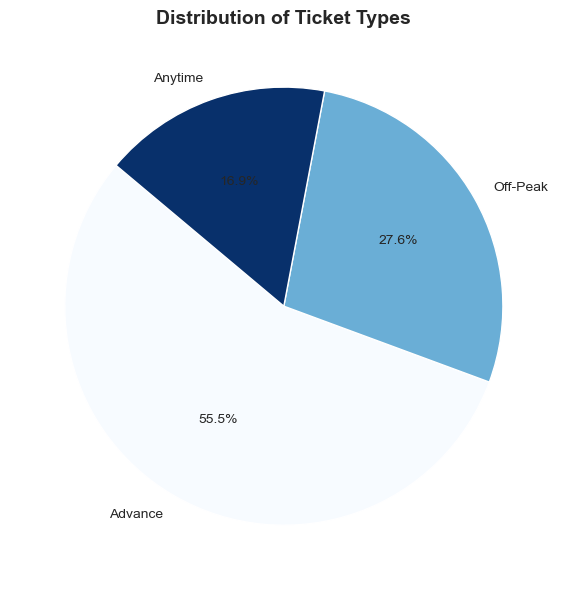

In [44]:
# Most Common Ticket Type (Pie)
plt.figure(figsize=(6,6))
df['ticket_type'].value_counts().plot.pie(autopct='%1.1f%%',startangle=140, cmap='Blues')
plt.title("Distribution of Ticket Types", fontsize = 14, fontweight = 'bold')
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.savefig("Distribution of Ticket Types.png")
plt.show()

In [45]:
#  Most Used Ticket Class
most_used_ticket_class = df['ticket_class'].value_counts().head(1)
print("Most Used Ticket Class:\n", most_used_ticket_class)

Most Used Ticket Class:
 ticket_class
Standard    28595
Name: count, dtype: int64


In [46]:
#  Average Ticket Price by Class
avg_price_by_class = df.groupby('ticket_class')['price'].mean()
print("Average Ticket Price by Class:\n", avg_price_by_class)

Average Ticket Price by Class:
 ticket_class
First Class    48.855134
Standard       20.721175
Name: price, dtype: float64


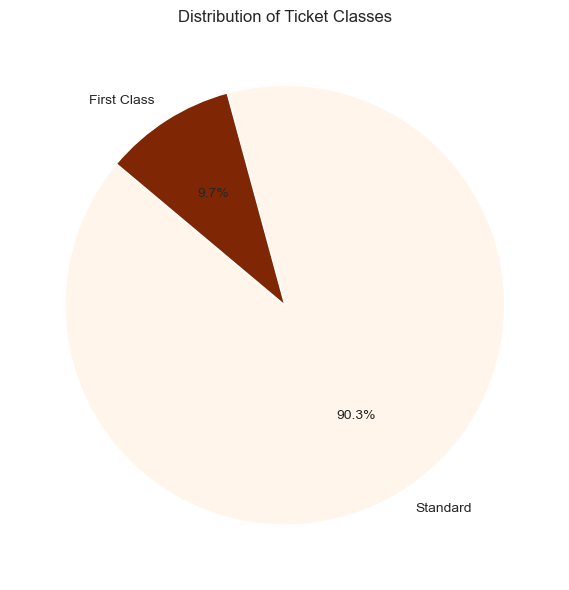

In [47]:
# Most Used Ticket Class (Pie)
plt.figure(figsize=(6,6))
df['ticket_class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140,cmap='Oranges')
plt.title("Distribution of Ticket Classes")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Distribution of Ticket Classes.png")
plt.show()

In [48]:
# Comparison: Average Ticket Price by Railcard Holders vs Non-Holders
avg_price_railcard = df.groupby('railcard')['price'].mean().sort_values(ascending = False)
print("Average Ticket Price by Railcard Holder:\n", avg_price_railcard)

Average Ticket Price by Railcard Holder:
 railcard
No Railcard    27.425997
Adult          17.814693
Disabled       16.923924
Senior         10.577143
Name: price, dtype: float64


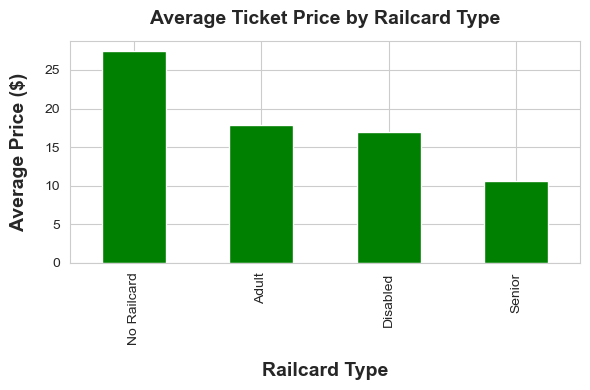

In [49]:
# Average Ticket Price by Railcard Type (Bar)
plt.figure(figsize=(6,4))
avg_price_railcard.plot.bar(color='green')
plt.title("Average Ticket Price by Railcard Type", fontsize = 14, fontweight = 'bold', pad = 12)
plt.ylabel("Average Price ($)", fontsize = 14, fontweight = 'bold', labelpad = 12)
plt.xlabel("Railcard Type", fontsize = 14, fontweight = 'bold', labelpad = 12)
plt.tight_layout()
plt.savefig("Average Ticket Price by Railcard Type.png")
plt.show()

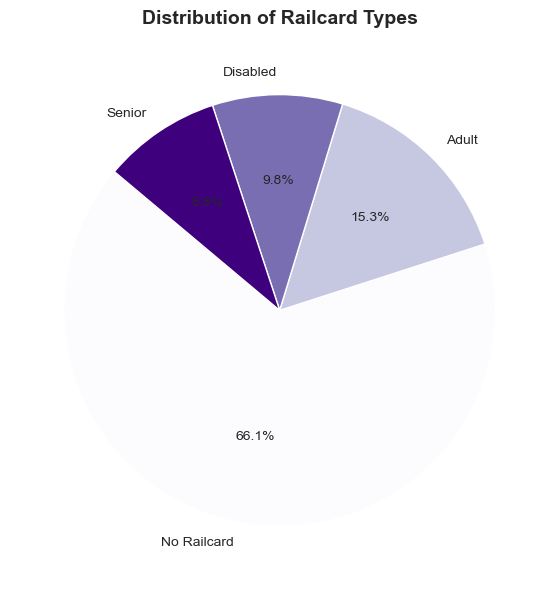

In [50]:
# Railcard Distribution (Pie)
plt.figure(figsize=(6,6))
df['railcard'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='Purples')
plt.title("Distribution of Railcard Types",fontsize = 14, fontweight = 'bold', pad = 12)
plt.ylabel("")
plt.tight_layout()
plt.savefig("Distribution of Railcard Types.png")
plt.show()

# Customer & Ticket Insights
- Most Common Ticket Type: The Advance ticket is the most frequently purchased, with 17,561 tickets sold. This indicates passengers prefer buying tickets in advance rather than at the last minute.
- Most Used Ticket Class: Standard class dominates with 28,595 tickets sold, showing that most passengers prefer the standard seating option.
- Average Ticket Price by Class: First Class tickets are priced higher on average ($48.86) compared to Standard class ($20.72), reflecting the premium for higher comfort and amenities.
- Average Ticket Price by Railcard Holder: Passengers without a railcard (No Railcard) spend the most on average ($27.43), while Senior passengers spend the least ($10.58) due to discounted fares. Adult and Disabled railcard holders also pay lower average prices, highlighting the impact of railcard discounts on ticket pricing.
  
These insights reveal passenger preferences, ticket class popularity, and the effect of railcard types on spending, which are useful for marketing strategies, pricing decisions, and service planning.

### Journey Performance Analysis

- **On-time vs Delayed Journeys:** Calculates the percentage of journeys that were on-time versus delayed.  
- **Most Common Reason for Delay:** Identifies the main factor causing delays, helping operational planning.  
- **Time of Day with Most Journeys:** Categorizes journeys into Morning, Afternoon, Evening, and Night to determine peak travel periods.  
- **Average Delay Duration:** Computes the mean delay in minutes for delayed journeys to assess performance and efficiency.

> These insights provide a clear view of operational performance, peak hours, and delay trends, useful for scheduling, 
resource allocation, and service improvement.

In [53]:
# Create a delay flag
df['delayed'] = df['journey_status'].apply(lambda x: 'Delayed' if x=='Delayed' else 'On-time')

In [54]:
# Percentage of On-time vs Delayed Journeys
journey_counts = df['delayed'].value_counts(normalize=True) * 100
print("Percentage of On-time vs Delayed Journeys:\n", journey_counts)

Percentage of On-time vs Delayed Journeys:
 delayed
On-time    92.75898
Delayed     7.24102
Name: proportion, dtype: float64


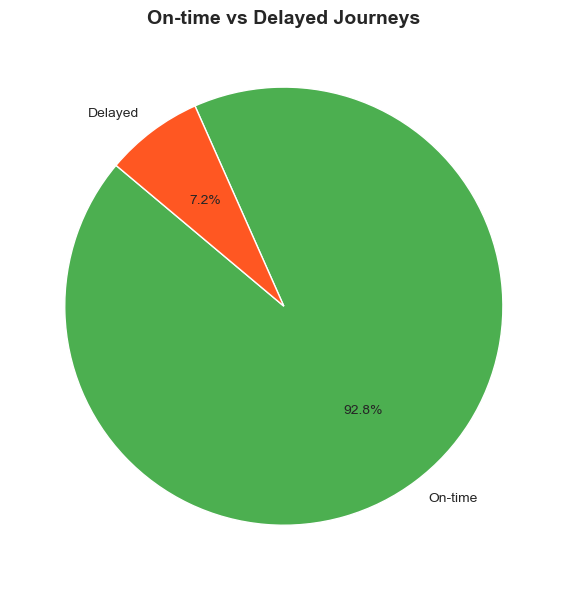

In [55]:
plt.figure(figsize=(6,6))
df['delayed'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=140, colors=['#4CAF50','#FF5722']
)
plt.title("On-time vs Delayed Journeys",fontsize = 14, fontweight = 'bold')
plt.ylabel("")
plt.tight_layout()
plt.savefig("On-time vs Delayed Journeys.png")
plt.show()

In [56]:
# Most Common Reason for Delay
common_delay_reason = df['reason_for_delay'].value_counts().head(1)
print("\nMost Common Reason for Delay:\n", common_delay_reason)


Most Common Reason for Delay:
 reason_for_delay
No Delay    27481
Name: count, dtype: int64


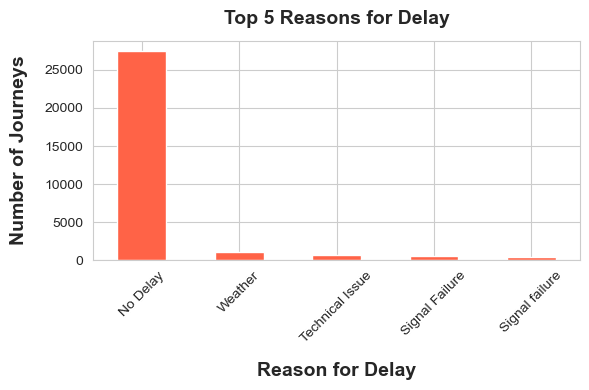

In [57]:
top_delay_reason = df['reason_for_delay'].value_counts().head(5)

plt.figure(figsize=(6,4))
top_delay_reason.plot.bar(color='tomato')
plt.title("Top 5 Reasons for Delay",fontsize = 14, fontweight = 'bold', pad = 12)
plt.ylabel("Number of Journeys",fontsize = 14, fontweight = 'bold', labelpad = 12)
plt.xlabel("Reason for Delay",fontsize = 14, fontweight = 'bold', labelpad = 12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Top 5 Reasons for Delay.png")
plt.show()

In [58]:
# Time of Day with Most Journeys
# Convert Departure Time to datetime.time
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S').dt.time
# Function to categorize time of day
def time_of_day(t):
    if t >= pd.to_datetime('05:00:00').time() and t < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif t >= pd.to_datetime('12:00:00').time() and t < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    elif t >= pd.to_datetime('17:00:00').time() and t < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['departure_time'].apply(time_of_day)
time_of_day_counts = df['time_of_day'].value_counts()
print("\nJourneys by Time of Day:\n", time_of_day_counts)


Journeys by Time of Day:
 time_of_day
Morning      11709
Evening       7497
Afternoon     6425
Night         6022
Name: count, dtype: int64


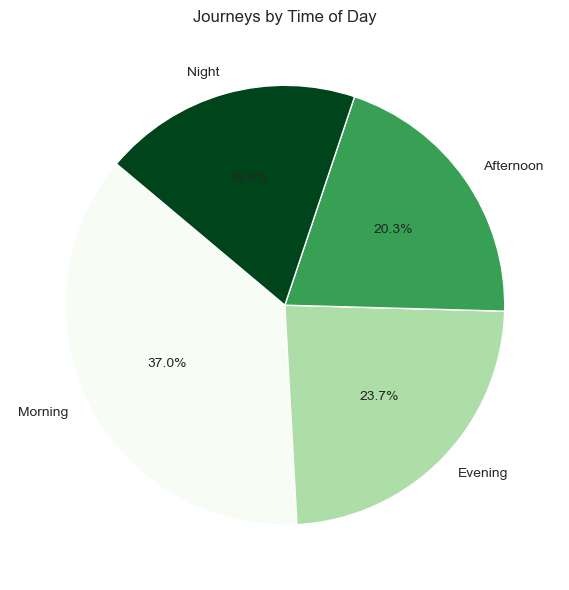

In [59]:
plt.figure(figsize=(6,6))
df['time_of_day'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=140, cmap="Greens"
)
plt.title("Journeys by Time of Day")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Journeys by Time of Day.png")
plt.show()

In [60]:
# Average Delay Duration
# Create delay duration column from Actual Arrival and Arrival Time 
df['delay_duration (min)'] = (df['actual_arrival_time'] - df['arrival_time']).dt.total_seconds() / 60

delayed_df = df[df['journey_status'] == 'Delayed']
delayed_df['delay_duration (min)'].mean()

42.21335078534032

# Journey Performance Analysis – Key Insights
- 92.76% of journeys were On-time, while only 7.24% experienced delays, indicating strong overall operational performance.
- Although delays were rare, the average delay among delayed journeys was 42.21 minutes, showing that when delays occur, they are significant.
- The overall average delay across all journeys was 3.25 minutes, which appears low due to the high percentage of on-time trips.
- Morning recorded the highest number of journeys, suggesting peak operational demand during early hours.
# Final Interpretation
The railway system demonstrates high punctuality; however, the severity of delays (42+ minutes on average when they occur) suggests an opportunity to improve delay management and response strategies.

# Refund & Revenue Impact Analysis
- Number of Refund Requests: This measures how many journeys resulted in a refund request, 
indicating customer dissatisfaction or service disruption levels.
- Refund Likelihood by Journey Status: By comparing refund rates between on-time and delayed journeys, 
we assess whether delays significantly influence refund behavior. 
A higher refund percentage among delayed journeys suggests that service reliability directly impacts customer compensation claims.
- Total Revenue Associated with Refunded Tickets: This calculates the total ticket revenue tied to refunded journeys, 
helping quantify the financial impact of refunds on overall revenue performance.

This analysis provides insight into the relationship between operational performance and financial outcomes, 
highlighting how delays may contribute to revenue loss through refund claims.

In [63]:
# Number of Journeys with Refund Requests

refund_count = df[df['refund_request'] == 'Yes'].shape[0]
refund_count

1118

In [64]:
#Are Delayed Journeys More Likely to Be Refunded?
refund_by_status = pd.crosstab(
    df['journey_status'],
    df['refund_request'],
    normalize='index'
) * 100

refund_by_status

refund_request,No,Yes
journey_status,,
Cancelled,69.574468,30.425532
Delayed,76.178010,23.821990
On Time,100.000000,0.000000


In [65]:
# Total Revenue Associated with Refunded Tickets
total_refund_revenue = df[df['refund_request'] == 'Yes']['price'].sum()
total_refund_revenue

38702

In [66]:
total_refund_revenue = df.groupby('refund_request')['price'].sum()
total_refund_revenue

refund_request
No     703219
Yes     38702
Name: price, dtype: int64

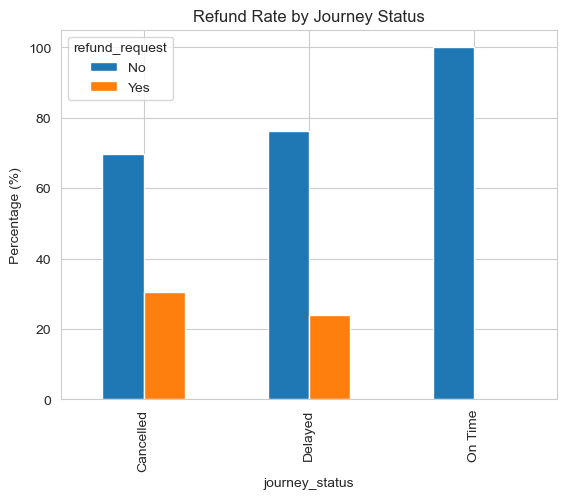

In [67]:
# Refund Rate by Journey Status (Bar Chart)
refund_by_status.plot(kind='bar')
plt.title("Refund Rate by Journey Status")
plt.ylabel("Percentage (%)")
plt.savefig("Refund Rate by Journey Status.png")
plt.show()

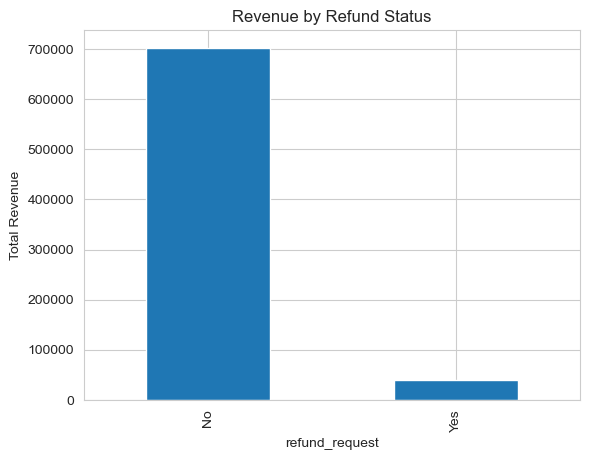

In [68]:
# Revenue Impact (Bar Chart)
df.groupby('refund_request')['price'].sum().plot(kind='bar')
plt.title("Revenue by Refund Status")
plt.ylabel("Total Revenue")
plt.savefig("Revenue by Refund Status.png")
plt.show()

# Refund & Revenue Impact Analysis
- Number of Refund Requests: A total of 1,118 journeys had refund requests, representing a small portion of overall transactions.
- Refund Distribution: Most transactions were not refunded (703,219 – No) compared to refunded transactions (38,702 – Yes in total revenue value).
-Refund Likelihood by Journey Status:
    - Cancelled journeys had the highest refund rate (30.43%),
    - Followed by Delayed journeys (23.82%),
    - While On-Time journeys had 0% refunds.
        
This clearly shows that operational disruptions (cancellations and delays) significantly increase the likelihood of refund requests.
-Revenue Impact: Refunded tickets account for $38,702 in revenue, representing the financial cost associated with service disruptions.
Overall, refunds are strongly linked to cancellations and delays, 
demonstrating that service reliability directly affects revenue retention and customer compensation costs.

# Business-Style Executive Summary
- The railway ticketing dataset shows strong operational performance and profitable revenue streams. Total revenue reached $741,921, with an average ticket price of $23.44.
- Passenger behavior indicates a preference for Advance tickets and Standard class, with Credit Card as the most frequently used payment method.
- Operational efficiency is high: 92.76% of journeys are on-time. However, when delays occur, they are significant, averaging 42 minutes, predominantly affecting morning travel peaks. Refunds are primarily associated with cancelled (30%) and delayed (24%) journeys, resulting in a financial impact of $38,702.
  
Overall, revenue performance is solid, passenger preferences are clear, and operational reliability drives both satisfaction and financial outcomes.

# Insights & Recommendations
**Three Key Business Insights:**
    -Revenue Concentration: Top stations and payment methods account for the majority of sales, highlighting strategic hubs and preferred transaction channels.
    -Operational Reliability Drives Customer Experience: On-time performance is high, but delays and cancellations directly lead to refunds.
    -Pricing & Railcard Effects: Railcard discounts significantly reduce average ticket revenue, with No Railcard passengers contributing the most per journey.
  
**Two Practical Recommendations:**
    -Improve Delay Management: Focus on reducing the frequency and severity of delays to minimize refund costs and improve customer satisfaction.
    -Targeted Marketing for Railcard Holders: Offer tailored promotions or loyalty incentives to encourage higher spending among discounted passenger segments.